In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\pamar\Downloads\StudentsPerformance.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [7]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

### rename race/ethnicity to ethnicity

In [8]:
df.rename(columns={'race/ethnicity':'ethnicity'},inplace=True)

In [9]:
df.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### remove spaces in column names

In [10]:
df.columns=df.columns.str.replace(" ","_")
df.columns

Index(['gender', 'ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

### clean null values if present

In [11]:
df.isna().sum()

gender                         0
ethnicity                      0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [12]:
df=df.dropna()
df

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### explore unique values in catagorical columns

In [15]:
df[["gender","ethnicity","parental_level_of_education","lunch","test_preparation_course"]].apply(pd.Series.unique)


gender                                                            [female, male]
ethnicity                          [group B, group C, group A, group D, group E]
parental_level_of_education    [bachelor's degree, some college, master's deg...
lunch                                                   [standard, free/reduced]
test_preparation_course                                        [none, completed]
dtype: object

In [180]:
print(df["gender"].unique())
print(df["ethnicity"].unique())
print(df["parental_level_of_education"].unique())
print(df["lunch"].unique())
print(df["test_preparation_course"].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


### fix dtypes of the columns if needed

In [181]:
df.dtypes

gender                         object
ethnicity                      object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

### replace 'none' to 'not completed' in `test preration cource`

In [182]:
df["test_preparation_course"]=df["test_preparation_course"].replace("none","not completed")
df

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,not completed,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,not completed,90,95,93
3,male,group A,associate's degree,free/reduced,not completed,47,57,44
4,male,group C,some college,standard,not completed,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,not completed,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### check duplicate rows

In [183]:
print(df.duplicated().sum())

0


In [186]:
df['total_marks'] = df.apply(lambda x: x['math_score'] + x['reading_score'] + x['writing_score'], axis = 1)
df.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks
0,female,group B,bachelor's degree,standard,not completed,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,not completed,90,95,93,278
3,male,group A,associate's degree,free/reduced,not completed,47,57,44,148
4,male,group C,some college,standard,not completed,76,78,75,229


In [19]:
df['total_marks'] = df[['math_score','reading_score','writing_score']].sum(axis = 1)
df.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [22]:
df['division'] = df['total_marks'].apply(lambda x: 'First Division' if x >= 180 else 'Second Division' if x >= 150 else 'Third Division' if x >= 90 else 'Fail')


In [23]:
df.division.value_counts()

First Division     715
Second Division    182
Third Division      94
Fail                 9
Name: division, dtype: int64

In [193]:
df .head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,division
0,female,group B,bachelor's degree,standard,not completed,72,72,74,218,First Division
1,female,group C,some college,standard,completed,69,90,88,247,First Division
2,female,group B,master's degree,standard,not completed,90,95,93,278,First Division
3,male,group A,associate's degree,free/reduced,not completed,47,57,44,148,Third Division
4,male,group C,some college,standard,not completed,76,78,75,229,First Division


### Average marks of a student in all 3 subjects. 

In [209]:
print(df["total_marks"].mean())

203.312


count    1000.000000
mean      203.312000
std        42.771978
min        27.000000
25%       175.000000
50%       205.000000
75%       233.000000
max       300.000000
Name: total_marks, dtype: float64


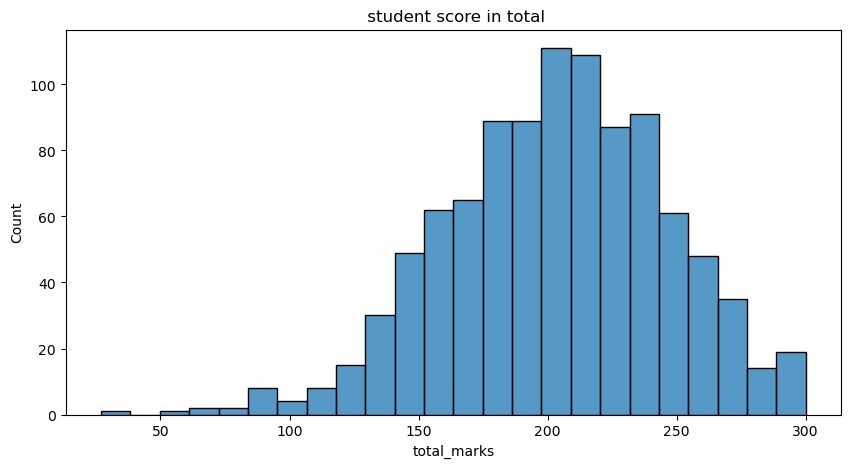

In [31]:
print(df.total_marks.describe())
plt.figure(figsize=(10,5))
sns.histplot(df.total_marks)
plt.title(' student score in total')
plt.show()


### Which student got the highest marks in total?

In [47]:
print(df.loc[df["total_marks"].idxmax()])


gender                                    female
ethnicity                                group E
parental_level_of_education    bachelor's degree
lunch                                   standard
test_preparation_course                     none
math_score                                   100
reading_score                                100
writing_score                                100
total_marks                                  300
division                          First Division
Name: 458, dtype: object


In [51]:

df.sort_values('total_marks', ascending=False).head(5)

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,division
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,First Division
458,female,group E,bachelor's degree,standard,none,100,100,100,300,First Division
962,female,group E,associate's degree,standard,none,100,100,100,300,First Division
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,First Division
179,female,group D,some high school,standard,completed,97,100,100,297,First Division


### which student got the lowest marks in total?

In [211]:
print(df.loc[df["total_marks"].idxmin()])

gender                                   female
ethnicity                               group C
parental_level_of_education    some high school
lunch                              free/reduced
test_preparation_course           not completed
math_score                                    0
reading_score                                17
writing_score                                10
total_marks                                  27
division                                   Fail
Name: 59, dtype: object


In [57]:
df.sort_values('total_marks', ascending=True).head(5)

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,division
59,female,group C,some high school,free/reduced,none,0,17,10,27,Fail
980,female,group B,high school,free/reduced,none,8,24,23,55,Fail
596,male,group B,high school,free/reduced,none,30,24,15,69,Fail
327,male,group A,some college,free/reduced,none,28,23,19,70,Fail
76,male,group E,some high school,standard,none,30,26,22,78,Fail


### What is the average score of students in each subjects? hint: #make box plot of each subject

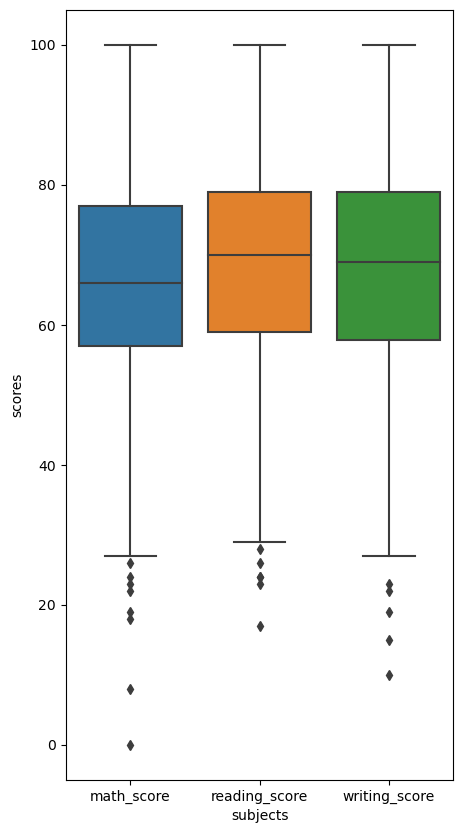

In [221]:

hi= pd.melt(frame = df, value_vars=['math_score','reading_score', 'writing_score'], var_name= 'subjects', value_name= 'scores')
hi
plt.figure(figsize= (5,10))
sns.boxplot(x = hi.subjects, y = hi.scores)
plt.show()

### Ratio of Male and Female students. hint: #pie chart

([<matplotlib.patches.Wedge at 0x17b9c755af0>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'female'),
  Text(0.06217041096298411, -1.0982417038160106, 'male')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.80%'),
  Text(0.033911133252536786, -0.5990409293541875, '48.20%')])

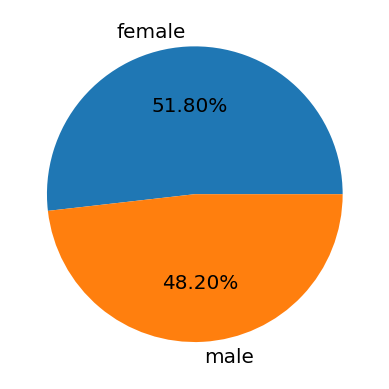

In [113]:
a=df.gender.value_counts()
a
plt.pie(x=a,labels = a.index,autopct='%0.2f%%',textprops = {'size': 'x-large'})

### Ratio of ethnicity of students. hint: # pie chart

([<matplotlib.patches.Wedge at 0x17b9c7ac1f0>,
 [Text(0.592324332246979, 0.9269044640242977, 'group C'),
  Text(-1.0461621742897658, 0.3399186742226879, 'group D'),
  Text(-0.49322154359063347, -0.9832255636109514, 'group B'),
  Text(0.5952333666001212, -0.9250390474384775, 'group E'),
  Text(1.057281962489778, -0.3035701760610943, 'group A')],
 [Text(0.3230859994074431, 0.5055842531041623, '31.90%'),
  Text(-0.5706339132489631, 0.18541018593964795, '26.20%'),
  Text(-0.2690299328676182, -0.5363048528787007, '19.00%'),
  Text(0.32467274541824787, -0.5045667531482604, '14.00%'),
  Text(0.5766992522671516, -0.1655837323969605, '8.90%')])

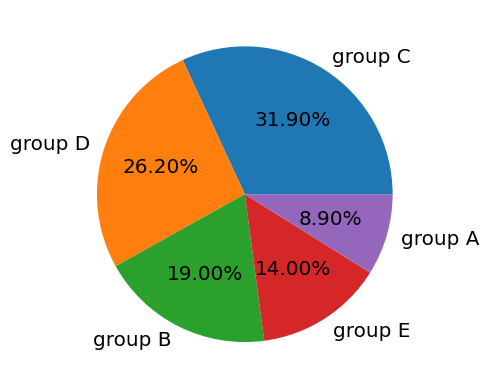

In [114]:
a=df.ethnicity .value_counts()
a
plt.pie(x=a,labels = a.index,autopct='%0.2f%%',textprops = {'size': 'x-large'})

### On an average which group performed the best in total marks? hint: group by then pivot table (col = gen, index= eth, val = total)

In [223]:
pivot_table = df.pivot_table(index="ethnicity", columns="gender", values="total_marks", aggfunc="mean")
print(pivot_table)


gender         female        male
ethnicity                        
group A    195.388889  184.622642
group B    202.528846  189.000000
group C    205.755556  195.748201
group D    214.317829  200.962406
group E    222.188406  214.436620


### Which gender perfomed better overall? hint: #bar plot

<AxesSubplot:xlabel='gender', ylabel='total_marks'>

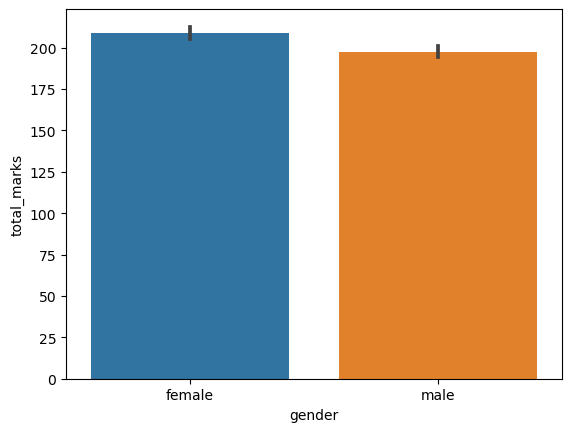

In [116]:
sns.barplot(data =df,x='gender',y='total_marks')

### Which gender performed better in each group?  hint: #bar

<AxesSubplot:xlabel='ethnicity', ylabel='total_marks'>

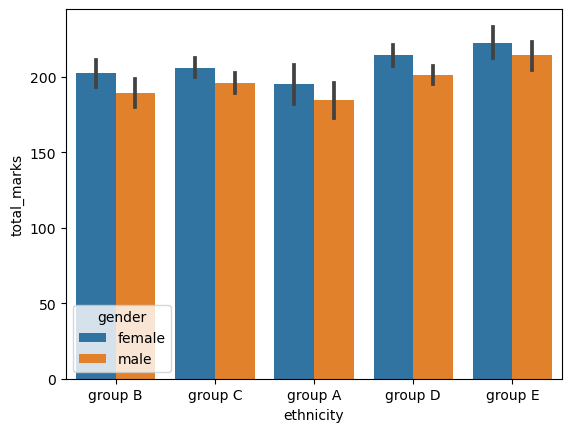

In [58]:
sns.barplot(data =df,x='ethnicity',y='total_marks',hue='gender')

### How many students have failed and which group have the most?

In [196]:
 k= df[df.division == 'Fail']
print(k.ethnicity.value_counts())

group B    5
group C    2
group E    1
group A    1
Name: ethnicity, dtype: int64


### students got more marks than others whose parents have higer education degree?



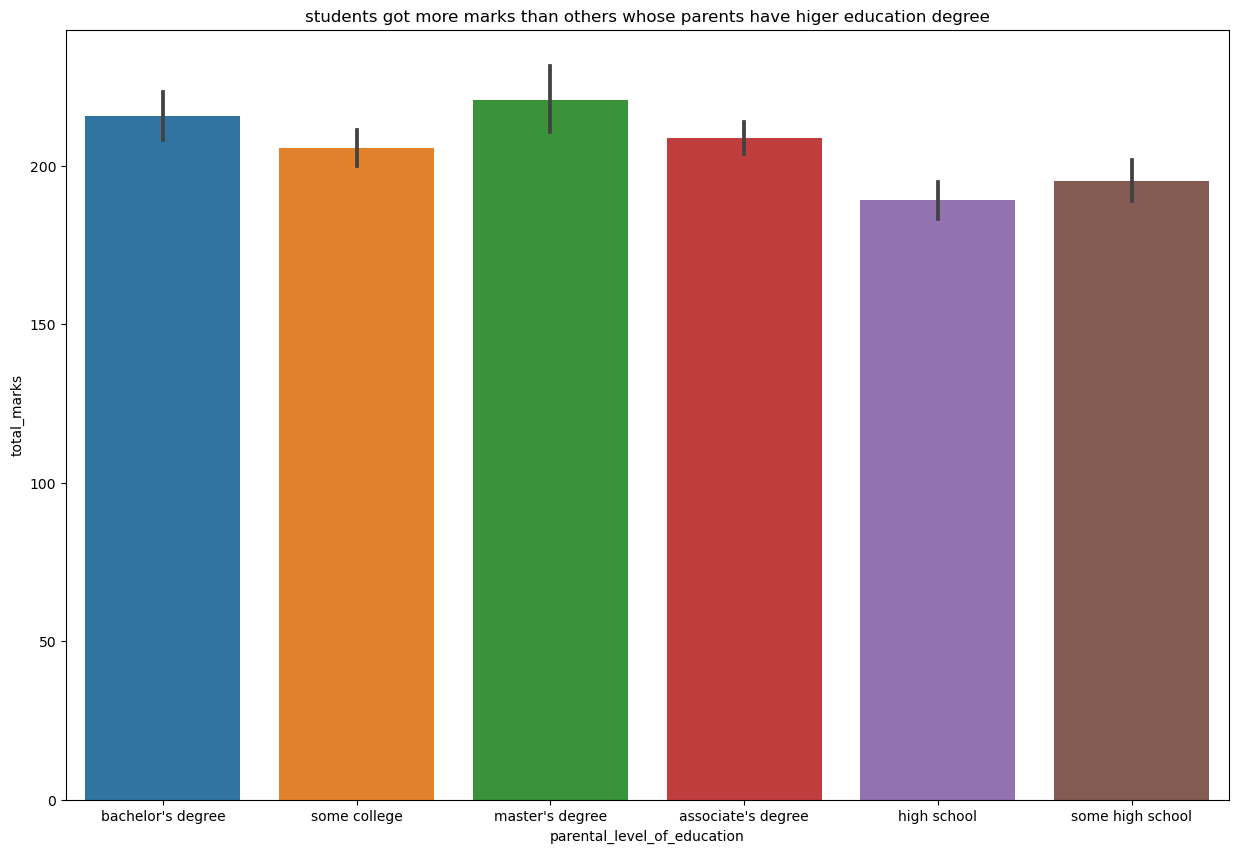

In [202]:
plt.figure(figsize=(15,10))
sns.barplot(data =df,x='parental_level_of_education',y='total_marks')
plt.title("students got more marks than others whose parents have higer education degree")
plt.show()

### Those students whose completed their course got more grades in compare to those student who didn't?

In [205]:
l=df.test_preparation_course.value_counts()
l

not completed    642
completed        358
Name: test_preparation_course, dtype: int64

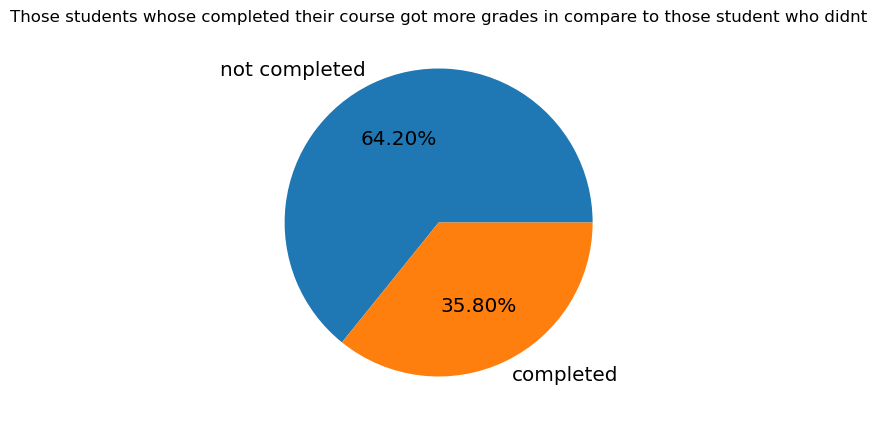

In [208]:
plt.figure(figsize=(5,5))
plt.pie(x = l,labels = l.index,autopct='%0.2f%%', textprops={'size': 'x-large'})
plt.title('Those students whose completed their course got more grades in compare to those student who didnt')
plt.show()
